In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import *
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
train_data = train_data.drop(columns=['id'])
train_data['class'] = train_data['class'].map({'p': 0,'e': 1})

test_ids = test_data['id']
test_data = test_data.drop(columns=['id'])

train_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,0,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,1,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,1,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,1,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
print(train_data.shape)
print(train_data.isna().sum())

(3116945, 21)
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


In [6]:
train_data = train_data.drop(columns=['spore-print-color', 'veil-color', 'veil-type', 'stem-root', 'stem-surface'])
test_data = test_data.drop(columns=['spore-print-color', 'veil-color', 'veil-type', 'stem-root', 'stem-surface'])

In [7]:
print(train_data.shape)
print(train_data.isna().sum())

(3116945, 16)
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-color                   38
has-ring                     24
ring-type                128880
habitat                      45
season                        0
dtype: int64


In [8]:
cat_cols = []
num_cols = []
for col in train_data.columns:
    if train_data[col].dtype=='object':
        cat_cols.append(col)
    elif train_data[col].dtype=='float64':
        num_cols.append(col)

In [9]:
for col in train_data.columns:
    if col in num_cols:
        fill_value = train_data[col].median()
        train_data[col] = train_data[col].fillna(fill_value)
        fill_value = test_data[col].median()
        test_data[col] = test_data[col].fillna(fill_value)
    elif col in cat_cols:
        fill_value = train_data[col].mode()[0]
        train_data[col] = train_data[col].fillna(fill_value)
        fill_value = test_data[col].mode()[0]
        test_data[col] = test_data[col].fillna(fill_value)

In [10]:
cat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [18]:
test_data.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.64,x,t,n,t,a,c,w,11.13,17.12,w,t,g,d,a
1,6.90,o,t,o,f,a,c,y,1.27,10.75,n,f,f,d,a
2,2.00,b,g,n,f,a,c,n,6.18,3.14,n,f,f,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u
4,6.17,x,h,y,f,p,c,y,6.73,13.70,y,t,f,d,u


In [20]:
encoder = OrdinalEncoder()

for col in cat_cols:
    train_data[col] = encoder.fit_transform(train_data[[col]])
    test_data[col] = encoder.transform(test_data[[col]])

ValueError: Found unknown categories ['19.76', '9.49', '0.93', '3.15', '3.23', 'r', 'u', 's', 'h', 'o', '8.3', 'cap-diameter', '2.02', '4.86', '0.74', '1.25', '6', 'i', 'w', 'm', 'n', '51.63', 'l', 'x', 'f', 'c', 'is f', '5 f', '4.41', '4.54', '17.89', '6.52', '6.47', 'ring-type', 'd', 'g', 'y', '4.51', '11.43', '4.55', '1.53', '7.21', '8', '3.94', '0.97', 'b', 'z', '2.7', '5.59', 't', 'a', '5.05', '3.34', 'k', 'p f', '6.15', '6.75', '3.47', '3.32', '3.73', 'e', 'p'] in column 0 during transform

In [ ]:
train_data.head()

In [ ]:
class Encoding(BaseEstimator ,TransformerMixin):

    def fit(self ,X ,y=None):
        return self

    def transform(self, X):
        encoder = OrdinalEncoder()
        if 'class' in X.columns:
            for column in X.drop("class" ,axis = 1).columns:
                if X[column].dtype == "object":
                    X[column] = encoder.fit_transform(X[[column]]).astype("float32")
        else:
            for column in X.columns:
                if X[column].dtype == "object":
                    X[column] = encoder.fit_transform(X[[column]]).astype("float32")
        return X
    
class Scaling_Data(BaseEstimator ,TransformerMixin):

    def fit(self ,X ,y=None):
        return self

    def transform(self ,X):
        scaler = StandardScaler()
        if 'class' in X.columns:
            for column in X.columns[1:-1]:
                X[column] = scaler.fit_transform(X[[column]])
        else:
            for column in X.columns[:-1]:
                X[column] = scaler.fit_transform(X[[column]])
        return X

pipeline = Pipeline([
    ('remove_columns' ,Removing_Columns()),
    ('data_cleaning' ,Data_Cleaning()),
    ('encoding' ,Encoding()),
    ('drop_dupli' ,Drop_Duplication()),
    ('scaling' ,Scaling_Data()),
    ('outliers' ,Outlier_Remover()),
])

In [ ]:
train_data = pipeline.fit_transform(train_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/tmp/ipykernel_36/1682488225.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("is_outlier" ,axis = 1 ,inplace = True)


In [12]:
train_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,8.80,53.0,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,0,4.51,71.0,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,1,6.94,53.0,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,1,3.88,53.0,y,g,f,s,c,g,4.16,6.53,w,f,f,d,u
4,1,5.85,71.0,l,w,f,d,c,w,3.37,8.36,w,f,f,g,a


In [13]:
train_data.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [16]:
sns.heatmap(train_data.corr())

ValueError: could not convert string to float: 'a'

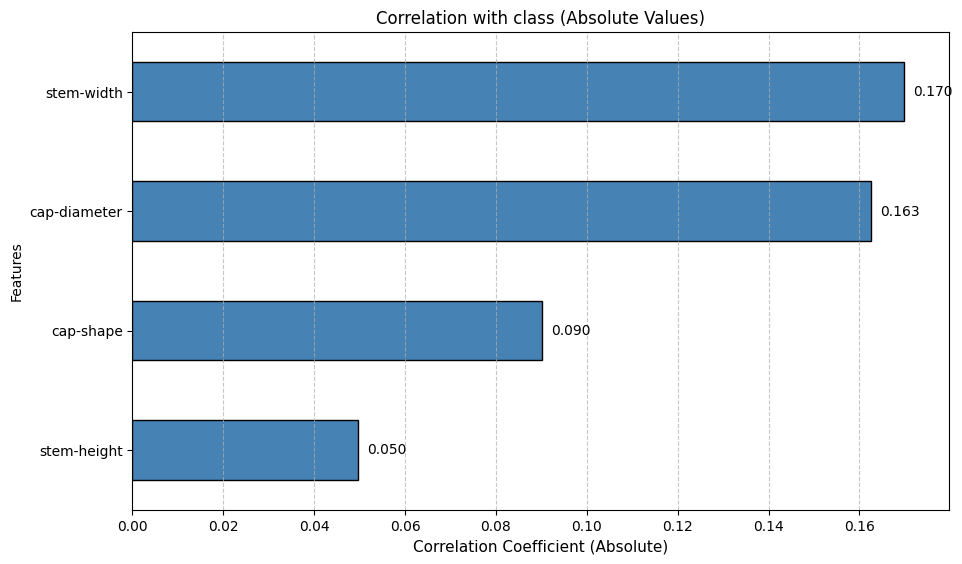

In [15]:
numeric_data = train_data.select_dtypes(include=['number']).copy()

correlation_matrix = numeric_data.corr()

correlation_with_target = correlation_matrix['class'].drop('class').abs()

correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = correlation_with_target_sorted.plot(kind='barh', color='steelblue', edgecolor='black')

for index, value in enumerate(correlation_with_target_sorted):
    if not (pd.isna(value) or value == float('inf') or value == float('-inf')):
        plt.text(value + 0.002, index, f"{value:.3f}", va='center', fontsize=10)

ax.invert_yaxis()

max_value = correlation_with_target_sorted.max()
plt.xlim(0, max_value + 0.01)
plt.title(f"Correlation with class (Absolute Values)", fontsize=12)
plt.xlabel("Correlation Coefficient (Absolute)", fontsize=11)
plt.ylabel("Features", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2)
plt.show()

In [12]:
X = train_data.drop(columns='class')
y = train_data['class']

In [13]:
model = Sequential([
    Dense(units=100, activation=None, kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dense(units=75, activation=None ,kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dense(units=50, activation=None ,kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [15]:
model.fit(X_train ,y_train ,epochs = 10 ,batch_size = 64)

Epoch 1/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - accuracy: 0.9530 - loss: 0.2678
Epoch 2/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9680 - loss: 0.1490
Epoch 3/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9681 - loss: 0.1446
Epoch 4/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9686 - loss: 0.1415
Epoch 5/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9685 - loss: 0.1410
Epoch 6/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 0.9688 - loss: 0.1394
Epoch 8/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9689 - loss: 0.1387
Epoch 9/10
  375/37008 ━━━━━━━━━━━━━━━━━━━━ 1:24 2ms/step - accuracy: 0.9670 - loss: 0.1420

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



37008/37008 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 0.9686 - loss: 0.1394
Epoch 10/10
37008/37008 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - accuracy: 0.9686 - loss: 0.1401


In [16]:
model.evaluate(X_test, y_test)

18504/18504 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9791 - loss: 0.1115


[0.11145343631505966, 0.9790093302726746]

In [17]:
pipeline_test = Pipeline([
    ('remove_columns' ,Removing_Columns()),
    ('data_cleaning' ,Data_Cleaning()),
    ('encoding' ,Encoding()),
    ('scaling' ,Scaling_Data())
])

In [18]:
test_data = pipeline_test.fit_transform(test_data)

In [19]:
test_data.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0.498097,0.885704,0.702379,-0.203845,2.168998,-0.854947,-0.324214,0.853583,1.772335,0.737221,0.860480,1.776972,-0.080351,-0.52408,0.0
1,0.126735,-0.103973,0.702379,-0.046764,-0.461043,-0.854947,-0.324214,1.097958,-1.880901,-0.049181,-0.843263,-0.562745,-0.303448,-0.52408,0.0
2,-0.919055,-1.643471,-1.289345,-0.203845,-0.461043,-0.854947,-0.324214,-0.490479,-0.061693,-0.988666,-0.843263,-0.562745,-0.303448,-0.52408,1.0
3,-0.605318,0.885704,0.702379,-0.203845,-0.461043,1.275605,-0.324214,-0.490479,-0.506306,-0.325718,0.860480,1.776972,4.381594,-0.52408,2.0
4,-0.029067,0.885704,-1.156564,1.524046,-0.461043,1.062549,-0.324214,1.097958,0.142088,0.315009,1.122594,1.776972,-0.303448,-0.52408,2.0


In [20]:
pred = model.predict(test_data)
pred = [('e' if p>=0.5 else 'p') for p in pred]

64937/64937 ━━━━━━━━━━━━━━━━━━━━ 75s 1ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [26]:
submission = pd.DataFrame({
    'id': test_ids,
    'class': pred
})

submission.to_csv('submission.csv', index=False)